In [1]:
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns

In [2]:
cases_18_29 = pd.read_csv('data_files/cases_by_race_ethnicity__18_-_29_years.csv', header=2, index_col=0)
death_18_29 = pd.read_csv('data_files/deaths_by_race_ethnicity__18_-_29_years.csv', header=2, index_col=0)

In [3]:
cases_18_29 = cases_18_29.sort_index(ascending=True)
death_18_29 = death_18_29.sort_index(ascending=True)

In [4]:
cases_18_29

,Percent of cases,Percent of US population
Race/Ethnicity,,
American Indian / Alaska Native Non-Hispanic,1.0,0.85
Asian Non-Hispanic,3.4,6.11
Black Non-Hispanic,10.5,14.44
Hispanic/Latino,32.9,21.96
Multiple/Other Non-Hispanic,5.6,2.89
Native Hawaiian / Other Pacific Islander Non-Hispanic,0.3,0.21
White Non-Hispanic,46.3,53.54


In [5]:
death_18_29

,Percentage of deaths,Percent of US population
Race/Ethnicity,,
American Indian / Alaska Native Non-Hispanic,2.5,0.85
Asian Non-Hispanic,2.7,6.11
Black Non-Hispanic,24.4,14.44
Hispanic/Latino,38.4,21.96
Multiple/Other Non-Hispanic,4.4,2.89
Native Hawaiian / Other Pacific Islander Non-Hispanic,0.6,0.21
White Non-Hispanic,26.9,53.54


In [6]:
ca = pd.read_csv('data_files/covid19casesdemographics.csv')
ca.head(5)

,demographic_category,demographic_value,total_cases,percent_cases,deaths,percent_deaths,percent_of_ca_population,report_date
0,Age Group,0-17,855,2.3,0,0.0,22.5,2020-04-22
1,Age Group,0-17,936,2.4,0,0.0,22.5,2020-04-23
2,Age Group,0-17,1011,2.5,0,0.0,22.5,2020-04-24
3,Age Group,0-17,1039,2.5,0,0.0,22.5,2020-04-25
4,Age Group,0-17,1085,2.5,0,0.0,22.5,2020-04-26


In [7]:
ca = ca[ca['demographic_category']=='Race Ethnicity']
total_cases_percent = ca[['percent_cases','demographic_value']].groupby('demographic_value').max()
total_deaths_percent = ca[['percent_deaths','demographic_value']].groupby('demographic_value').max()

total_cases_percent = total_cases_percent.drop('Total',axis = 0)
total_deaths_percent = total_deaths_percent.drop('Total',axis = 0)

total_cases_percent.sort_index(inplace=True)
total_deaths_percent.sort_index(inplace=True)

In [8]:
total_cases_percent

,percent_cases
demographic_value,
American Indian or Alaska Native,0.3
Asian,13.0
Black,7.0
Latino,61.2
Multi-Race,3.9
Native Hawaiian and other Pacific Islander,1.7
Other,15.9
White,31.6


In [9]:
total_deaths_percent

,percent_deaths
demographic_value,
American Indian or Alaska Native,0.5
Asian,17.7
Black,12.1
Latino,48.7
Multi-Race,1.5
Native Hawaiian and other Pacific Islander,1.4
Other,2.6
White,41.1


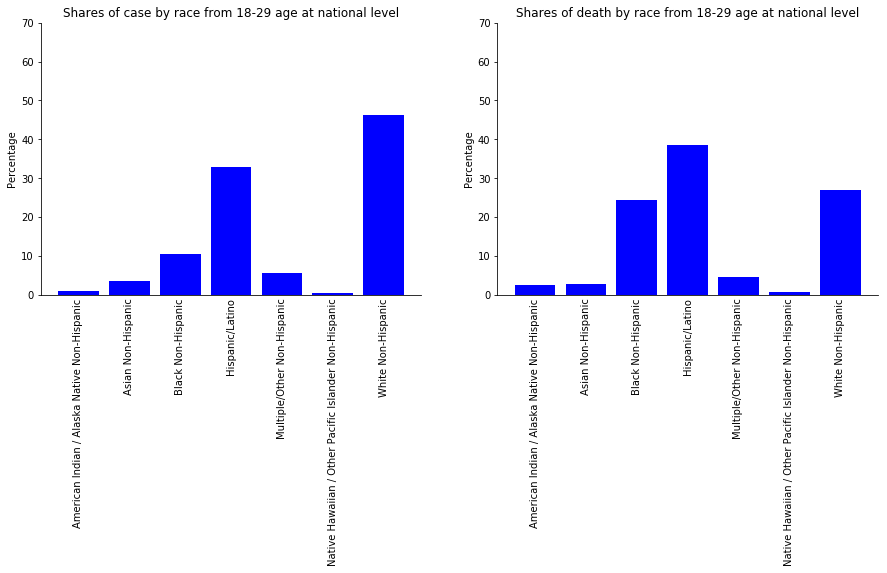

In [10]:
fig, ax = plt.subplots(1,2,figsize=(15,5))

ax[0].bar(cases_18_29.index, cases_18_29['Percent of cases'], color='blue')
ax[0].set_title('Shares of case by race from 18-29 age at national level')


ax[1].bar(death_18_29.index, death_18_29['Percentage of deaths'], color='blue')
ax[1].set_title('Shares of death by race from 18-29 age at national level')

for i in range(2):
    ax[i].set_ylabel('Percentage')
    ax[i].set_ylim(0,70)
    ax[i].tick_params(axis='x', labelrotation=90, length=0)
    sns.despine(ax=ax[i])

plt.savefig('national.svg')
    
plt.show()

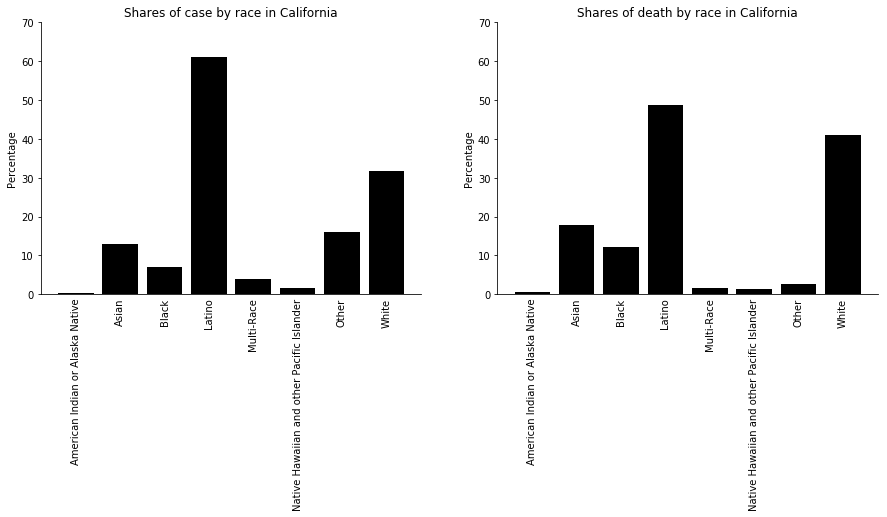

In [11]:
fig, ax = plt.subplots(1,2,figsize=(15,5))

ax[0].bar(total_cases_percent.index, total_cases_percent['percent_cases'], color = 'black')
ax[0].set_title('Shares of case by race in California')

ax[1].bar(total_deaths_percent.index, total_deaths_percent['percent_deaths'], color = 'black')
ax[1].set_title('Shares of death by race in California')

for i in range(2):
    ax[i].set_ylabel('Percentage')
    ax[i].set_ylim(0,70)
    ax[i].tick_params(axis='x', labelrotation=90, length=0)
    sns.despine(ax=ax[i])

plt.savefig('ca.svg')
    
plt.show()